In [1]:
import numpy
import scipy.special
import glob
import scipy.misc
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
class neuralNetwork:
    def __init__(self, inputNodes, hiddenOneNodes, hiddenTwoNodes, hiddenThreeNodes, finalNodes, alpha):
        self.inputNodes = inputNodes
        self.hiddenOneNodes = hiddenOneNodes
        self.hiddenTwoNodes = hiddenTwoNodes
        self.hiddenThreeNodes = hiddenThreeNodes
        self.finalNodes = finalNodes
        self.alpha = alpha
        self.weightsInputHidden = numpy.random.normal(0.0, pow(self.hiddenOneNodes, -0.5),(self.hiddenOneNodes,self.inputNodes))
        self.weightsHiddenOneHiddenTwo = numpy.random.normal(0.0, pow(self.hiddenTwoNodes,-0.5),(self.hiddenTwoNodes,self.hiddenOneNodes))
        self.weightsHiddenTwoHiddenThree = numpy.random.normal(0.0, pow(self.hiddenThreeNodes,-0.5),(self.hiddenThreeNodes,self.hiddenTwoNodes))
        self.weightsHiddenOutput = numpy.random.normal(0.0, pow(self.hiddenOneNodes,-0.5),(self.finalNodes, self.hiddenThreeNodes))
        pass
    def train(self, inputs, target):
        inputs = numpy.array(inputs, ndmin=2).T
        target = numpy.array(target, ndmin=2).T
        hiddenInput = numpy.dot(self.weightsInputHidden,inputs)
        hiddenOneOutput = self.sigmoid(hiddenInput)
        hiddenTwoInput = numpy.dot(self.weightsHiddenOneHiddenTwo,hiddenOneOutput)
        hiddenTwoOutput = self.sigmoid(hiddenTwoInput)
        hiddenThreeInput = numpy.dot(self.weightsHiddenTwoHiddenThree,hiddenTwoOutput)
        hiddenThreeOutput = self.sigmoid(hiddenThreeInput)
        finalInput = numpy.dot(self.weightsHiddenOutput,hiddenThreeOutput)
        finalOutput = self.sigmoid(finalInput)
        outputError = target - finalOutput
        hiddenOutputError = numpy.dot(self.weightsHiddenOutput.T, outputError)
        hiddenThreeHiddenTwoError = numpy.dot(self.weightsHiddenTwoHiddenThree.T, hiddenOutputError)
        hiddenTwoHiddenOneError = numpy.dot(self.weightsHiddenOneHiddenTwo.T, hiddenThreeHiddenTwoError)
        hiddenInputError = numpy.dot(self.weightsInputHidden.T, hiddenTwoHiddenOneError)
        self.weightsHiddenOutput += self.alpha * numpy.dot((outputError * finalOutput * (1.0 - finalOutput)),numpy.transpose(hiddenThreeOutput))
        self.weightsHiddenTwoHiddenThree += self.alpha * numpy.dot((hiddenOutputError * hiddenThreeOutput * (1.0 - hiddenThreeOutput)),numpy.transpose(hiddenTwoOutput))
        self.weightsHiddenOneHiddenTwo += self.alpha * numpy.dot((hiddenThreeHiddenTwoError * hiddenTwoOutput * (1.0 - hiddenTwoOutput)),numpy.transpose(hiddenOneOutput))
        self.weightsInputHidden += self.alpha * numpy.dot((hiddenTwoHiddenOneError * hiddenOneOutput * (1.0 - hiddenOneOutput)),numpy.transpose(inputs))        
        pass
    def query(self, inputs):
        inputs = numpy.array(inputs, ndmin=2).T
        hiddenInput = numpy.dot(self.weightsInputHidden,inputs)
        hiddenOneOutput = self.sigmoid(hiddenInput)
        hiddenTwoInput = numpy.dot(self.weightsHiddenOneHiddenTwo,hiddenOneOutput)
        hiddenTwoOutput = self.sigmoid(hiddenTwoInput)
        hiddenThreeInput = numpy.dot(self.weightsHiddenTwoHiddenThree,hiddenTwoOutput)
        hiddenThreeOutput = self.sigmoid(hiddenThreeInput)
        finalInput = numpy.dot(self.weightsHiddenOutput,hiddenThreeOutput)
        finalOutput = self.sigmoid(finalInput)
        return finalOutput
        pass
    def sigmoid(self, x):
        return scipy.special.expit(x)
        pass
    def saveWeights(self):
        numpy.savetxt("Weights/ih.csv", self.weightsInputHidden, delimiter=",")
        numpy.savetxt("Weights/h1h2.csv", self.weightsHiddenOneHiddenTwo, delimiter=",")
        numpy.savetxt("Weights/h2h3.csv", self.weightsHiddenTwoHiddenThree, delimiter=",")
        numpy.savetxt("Weights/ho.csv", self.weightsHiddenOutput, delimiter=",")
        pass
    def loadWeights(self):
        self.weightsInputHidden = numpy.loadtxt(open("Weights/ih.csv", "rb"), delimiter=",")
        self.weightsHiddenOneHiddenTwo = numpy.loadtxt(open("Weights/h1h2.csv", "rb"), delimiter=",")
        self.weightsHiddenTwoHiddenThree = numpy.loadtxt(open("Weights/h2h3.csv", "rb"), delimiter=",")
        self.weightsHiddenOutput =  numpy.loadtxt(open("Weights/ho.csv", "rb"), delimiter=",")
        pass

In [3]:
class dataClass:
    def prepareData(self, locationFrom, locationTo):
        j=0
        for fish in glob.glob(locationFrom+'/*.jpg'):
            try:
                im=Image.open(fish)
                im = im.convert('LA')
                #im = im.convert('1')
                im = im.resize((32, 32), Image.ANTIALIAS) #picture sizeX*sizeY
                im.save(locationTo+'/'+str(j)+'.png')
                j+=1
            except Exception: 
                pass
        for fish in glob.glob(locationFrom+'/*.png'):
            try:
                im=Image.open(fish)
                im = im.convert('LA')
                #im = im.convert('1')
                im = im.resize((32, 32), Image.ANTIALIAS) #picture sizeX*sizeY
                im.save(locationTo+'/'+str(j)+'.png')
                j+=1
            except Exception: 
                pass
        for fish in glob.glob(locationFrom+'/*.gif'):
            try:
                im=Image.open(fish)
                im = im.convert('LA')
                #im = im.convert('1')
                im = im.resize((32, 32), Image.ANTIALIAS) #picture sizeX*sizeY
                im.save(locationTo+'/'+str(j)+'.png')
                j+=1
            except Exception: 
                pass
        print(j)
        pass
    def loadData(self, locationFrom):
        dataset = []
        for image in glob.glob(locationFrom+'/*.png'):
            array = scipy.misc.imread(image, flatten=True)
            data  = 255.0 - array.reshape(1024) # reshape picture sizeX*sizeY
            data = (data / 255.0 * 0.99) + 0.01
            dataset.append(data)
        print(len(dataset))
        return dataset
        pass
    def preparePlot(self, locationFrom, locationTo):
        j=0
        for fish in glob.glob(locationFrom+'/*.jpg'):
            try:
                im=Image.open(fish)
                im.save(locationTo+'/'+str(j)+'.png')
                j+=1
            except Exception: 
                pass
        for fish in glob.glob(locationFrom+'/*.png'):
            try:
                im=Image.open(fish)
                im.save(locationTo+'/'+str(j)+'.png')
                j+=1
            except Exception: 
                pass
        for fish in glob.glob(locationFrom+'/*.gif'):
            try:
                im=Image.open(fish)
                im.save(locationTo+'/'+str(j)+'.png')
                j+=1
            except Exception: 
                pass
        print(j)
        pass

In [5]:
d = dataClass()

In [ ]:
# Prepare training data. All images from  N folders will be resized and converted to greyscale
d.prepareData('Data/Training/FishN','Data/Training/Fish')
d.prepareData('Data/Training/NotFishN','Data/Training/NotFish')
# Prepare testing data
d.prepareData('Data/Testing/QueryFishN','Data/Testing/QueryFish')
d.prepareData('Data/Testing/QueryNotFishN','Data/Testing/QueryNotFish')
# Prepare run data
d.prepareData('Data/Run/QueryN','Data/Run/Query')

In [6]:
#Load training data
dataset = d.loadData('Data/Training/Fish')
datasetNotFish = d.loadData('Data/Training/NotFish')

12313
12214


In [81]:
net = neuralNetwork(1024,30,8,8,1,0.01)

In [74]:
#Load weights
net.loadWeights()

In [ ]:
#Train the network
for j in range(10):
    for i in range(12000):
        net.train(dataset[i], [0.99])
        net.train(datasetNotFish[i], [0.01])
        pass
    pass

In [ ]:
#d.prepareData('UneditedQuery','Query')
#For performance testing purposes
dN = dataClass()
queryData = dN.loadData('Data/Testing/QueryNotFish')
queryFish = dN.loadData('Data/Testing/QueryFish')
print('-------------------')
nf = len(queryData) # Not fish sample length
f = len(queryFish) # Fish sample length
t = nf+f # Total sample length
print(str(t) + ' Total sample size')
print('-------------------')
snf = 0 # Successfully classified as not a fish
sf = 0 # Successfully classified as a fish
print('Not-fish query')
for d in queryData:
    q = net.query(d)
    #print(q)
    if q < 0.5:
        snf+=1
    pass
print(str((100/nf)*(snf))+'%')
print(str(snf) + '/' + str(nf) + ' Correctly classified')
print('-------------------')
print('Fish query')
for d in queryFish:
    q = net.query(d)
    #print(q)
    if q > 0.5:
        sf+=1
    pass
print(str((100/f)*(sf))+'%')
print(str(sf) + '/' + str(f) + ' Correctly classified')
print('-------------------')
print(str(sf+snf) + '/' + str(f+nf) + ' Correctly classified')
print(str((100/t)*(sf+snf))+'%')

In [ ]:
#net.saveWeights()

10
10
10
[[ 0.13063236]]


[[ 0.13063236]]


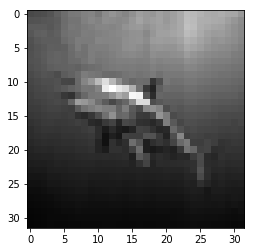

[[ 0.13063238]]


[[ 0.89541073]]


[[ 0.31876598]]


[[ 0.31876598]]


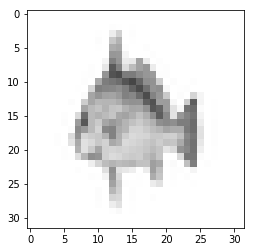

[[ 0.13063236]]


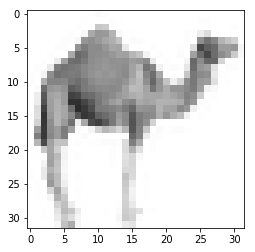

[[ 0.32095721]]


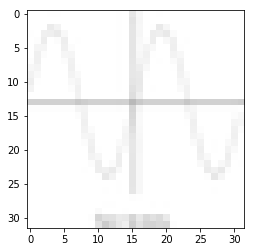

[[ 0.61610766]]


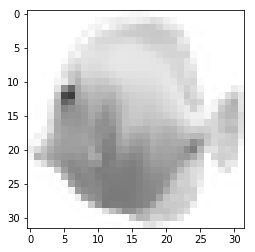

[[ 0.13063236]]


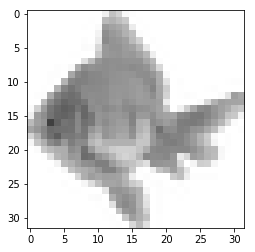

In [88]:
%matplotlib inline
dN = dataClass()
dN.prepareData('Data/Run/QueryN','Data/Run/Query')
dN.preparePlot('Data/Run/QueryN','Data/Run/QPlot')
query = dN.loadData('Data/Run/Query')
plot = []
for i in glob.glob('Data/Run/Query/*.png'):
    plot.append(i)
    pass

for d in range(len(query)):
    q = net.query(query[d])
    print(q)
    img= plt.imread(plot[d])
    imgplot = plt.imshow(img)
    plt.show()
    pass

#im = 0
#for image in glob.glob('Data/Run/QPlot/*.png'):
#    img= plt.imread(image)
#    print(net.query(query[im]))
#    imgplot = plt.imshow(img)
#    plt.show()
#    im += 1
